**Numpy (but first lists)**

Numbers are the basis of all computer's computations.
We rarely operate on single numbers, usually we work on the whole list/array/vector of numbers.
This is what `numpy` is designed for.

One might ask _what's wrong with built-in `list` type_?
Let's start with talking a closer look at `list`.

## Lists reminder

### Creating list

In [1]:
l = [1, 2, 3] 
l

[1, 2, 3]

In [2]:
type(l), l[0], l[-1], len(l), sum(l)

(list, 1, 3, 3, 6)

Elements of single list might be of different type

In [3]:
l2 = [1, "a", "0"]

Ways to index the list

In [4]:
l2[0], l2[:], l2[-1]

(1, [1, 'a', '0'], '0')

Since we don't know how to add elements of `l2`, `sum(l2)` will raise an error.

In [5]:
sum(l2)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

Additional remark.
(Although we shouldn't try it) python allows `sum([1, 2.5, 3j])`, calculating sum of list with different numeric types. 

In [6]:
l3 = [1, 2.5, 3j]
for e in l3:
    print(f"Element {e} is of type {type(e)}")
sum(l3)


Element 1 is of type <class 'int'>
Element 2.5 is of type <class 'float'>
Element 3j is of type <class 'complex'>


(3.5+3j)

Multiplying `list` by `int` repeats the list.

In [7]:
[0] * 5

[0, 0, 0, 0, 0]

In [8]:
[1, 2, 3] * 4

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

There is a subtlety however.
Elements of repeated `list` are a _shallow copies_ of the original lists' elements.

The following example presents the behavior:

In [9]:
ll = [[]] * 3  # list with three empty lists
ll

[[], [], []]

In [10]:
ll[0].append(42)  # we append 42 to the first list
ll[0]

[42]

In [11]:
ll  # the element has been added to every list! it's actually THE SAME list

[[42], [42], [42]]

Two interesting threads on Stack Overflow regarding this issue:

- [least-astonishment-and-the-mutable-default-argument](https://stackoverflow.com/questions/1132941/least-astonishment-and-the-mutable-default-argument)
- [what-is-the-pythonic-way-to-avoid-default-parameters-that-are-empty-lists](https://stackoverflow.com/questions/366422/what-is-the-pythonic-way-to-avoid-default-parameters-that-are-empty-lists)

### Iterating over the list

In [12]:
print(l)

for e in l:
    print(e**2)

[1, 2, 3]
1
4
9


In [13]:
for i, e in enumerate(l):
    print(i, e**2)

0 1
1 4
2 9


It's worth to get to know better with _list comprehension_, super useful.

In [14]:
l3 = [i**2 for i in range(10)]
l3

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

### List indexing

Elements from the third (with index 2) till the end.

In [15]:
l3[2:]

[4, 9, 16, 25, 36, 49, 64, 81]

Elements of indices from 2 (inclusive) to 3 (exclusive)
Since indexing `l[i:j]` always returns list, we receive a single-element list, not just value `l3[2]`.

In [16]:
l3[2:3]

[4]

Negative indices exist in python, they go from the end of an array.
Here we receive the whole list, but the last element.

In [17]:
l3[:-1]

[0, 1, 4, 9, 16, 25, 36, 49, 64]

It's good to omit the redundant indices like bellow where we want to take all elements with indices smaller than 4.

In [18]:
l3[0:4] == l3[:4]

True

The default indexing also allow taking every n-th element and reversing the list.

In [19]:
l3[::2]

[0, 4, 16, 36, 64]

In [20]:
l3[3:8:2]  # From element 3 to 8, every 2 elements. Indices 3, 5, 7

[9, 25, 49]

In [21]:
l3[::-1]  # All elements, every -1 element - reversing the list

[81, 64, 49, 36, 25, 16, 9, 4, 1, 0]

## Numpy

So after this short remainder of lists in python we can finally go to numpy.

The basic structure we in numpy is `np.ndarray` n-dimensional array.
We can think about `np.ndarray` like about an list/array.
For $n=1$ it will be a vector, for $n = 2$ it will be a matrix.

In general we can call it a tensor, but we will call them _arrays_ as it's the most popular name.

Every time you have some problem, try googling first, probably someone already had this problem and the solution is available on StackOverflow.

Example google inputs:

- _concat array horizontally numpy_
- _reverse sort numpy_
- _add dimension in front numpy_
- _zeros bool array numba_


### Basics of array creation and indexing

[Numpy arrays creation tutorial.](https://numpy.org/doc/stable/user/basics.creation.html)
Let's try to do similar things as with lists.


In [22]:
import numpy as np

In [23]:
x = np.array([1, 2, 3])  # w ten sposób tworzymy array na podstawie pythonowej listy
x

array([1, 2, 3])

In [24]:
x[0], x[-1], len(x)

(1, 3, 3)

In [25]:
x[1:]

array([2, 3])

In [26]:
x[2:]

array([3])

In [27]:
x[::-1]

array([3, 2, 1])

In [28]:
3 in x

True

### Useful fields

Array has a few useful fields:

In [29]:
x.dtype, x.ndim  # data type and number of dimensions

(dtype('int64'), 1)

In [30]:
# number of elements in every dimension
# note that it's a single element tuple
x.shape

(3,)

### Multidimensional case

Now let's create multidimensional array using [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html). 

In [31]:
lr = list(range(12))
a = np.array(lr)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Note that we specify required shape as a tuple.

In [32]:
a2 = a.reshape((3, 4))
a2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Calling `reshape` method doesn't change `a` as it returns a copy.

In [33]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [34]:
a2[0, :]  # the first row

array([0, 1, 2, 3])

In [35]:
a2[0, :]  # the first column

array([0, 1, 2, 3])

In [36]:
a2[2, 3]  # an element from 3rd row and 4th column

11

In [37]:
a2[:, ::2]  # all rows and every second column

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [38]:
a2[:, 1::2]  # all rows and every second column starting from the one with index 1

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

### Typical ways of array creation

In practice we rarely create `np.ndarray` from the python list becuse we would have to first create the list only to immediately convert it into `np.ndarray`

Here are the typical ways to create an array.

In [39]:
np.zeros((2, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [40]:
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [41]:
np.arange(10)  # note that the last number is smaller than 10

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [42]:
np.arange(10).reshape((2, 5))

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [43]:
np.arange(2, 10, 3)  # from, to, every

array([2, 5, 8])

In [44]:
np.linspace(0, 5)  # in linspace, the last number is included as well

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

In [45]:
np.linspace(0, 5, 5)

array([0.  , 1.25, 2.5 , 3.75, 5.  ])

In [46]:
np.array([1, 2, 3]).repeat(3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

In [47]:
np.tile(np.array([1, 2, 3]), 3)

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

In [48]:
np.random.rand(10)  # 10 random numbers from [0, 1)

array([0.81627618, 0.08073465, 0.7453185 , 0.78812622, 0.99862186,
       0.15712126, 0.69040646, 0.63849645, 0.79207374, 0.19497058])

### Elements' types in arrays

Even though it hasn't been said loudly, we could see that every element of `np.ndarray` was of the same type.
Because of that, every element has a constant size and it allows efficient memory usage.
If we really want, we can make `nd.array` of `object` data type. This way every element of a list is treated as in python `list`, holding a reference.
This usually means we made some error on the way as working on such array will be very inefficient.

Bellow there are a few examples of how to change data type of array.
Be default `dtype` is `int` or `float`.
The dot after the number always mean it's a floating position number (not an integer).

[Checkout dtype documentation](https://numpy.org/doc/stable/user/basics.types.html)

In [49]:
(np.zeros(3), 
np.zeros(3, dtype=int), 
np.zeros(3, dtype=bool), 
np.zeros(3, dtype=np.uint16), 
np.zeros(3, dtype=complex))

(array([0., 0., 0.]),
 array([0, 0, 0]),
 array([False, False, False]),
 array([0, 0, 0], dtype=uint16),
 array([0.+0.j, 0.+0.j, 0.+0.j]))

In [50]:
x = np.zeros(3)
x[0] = 12
x[2] = -1
x.astype(np.float16)

array([12.,  0., -1.], dtype=float16)

Again, the original `x` hasn't been modified (the type's the same).

In [51]:
x

array([12.,  0., -1.])

Note we can create an overflow this way [](https://en.wikipedia.org/wiki/Integer_overflow)!

In [52]:
x.astype(np.uint8)

array([ 12,   0, 255], dtype=uint8)

In [53]:
x = np.array([1e100])
x, x.astype(np.float16)

(array([1.e+100]), array([inf], dtype=float16))

In [54]:
np.array(["ala", 2, int])

array(['ala', 2, <class 'int'>], dtype=object)

### Special pseudonumber

It's worth to know that the above `np.inf` (infinity) is float number, but a special one.
Also `np.nan` is a special number that is _not a number_.
In general it's part of IEEE 754 standard describing the way floats should work on every machine, in every programming language.

In [55]:
a = np.inf
a, a*5, a-4, a*0, -a, a+2, a-a

(inf, inf, inf, nan, -inf, inf, nan)

In [56]:
-0.0

-0.0

In [57]:
0.0

0.0

In [58]:
type(np.inf)

float

In [59]:
type(np.nan)

float

**Attention!!!** nan is not a nan

In [60]:
np.nan == np.nan, np.nan != np.nan, np.nan < np.nan, np.nan >= np.nan

(False, True, False, False)

In [61]:
np.isnan(np.r_[np.nan, 1, 2])

array([ True, False, False])

### Arrays with strings

Example bellow, note that `dtype='<U4'`. It describes all strings of length at most 4.
This means that every item of this array will have at most 4 signs, hence constant size.
In general it's a desired behaviour as it's easier for the computer to work on constant size elements, but if we would have an array of strings of length 2-5, with only one of length 10000 znaków, the array size will explode!

In [62]:
vala = np.array(["Ala", "ma", "kota"])
vala

array(['Ala', 'ma', 'kota'], dtype='<U4')

In [63]:
# Now we create two arrays, they are equal on all but the final index
vala1 = np.array(["Ala", "ma", "kota"] * 100)
vala2 = np.array(["Ala", "ma", "kota"] * 99 + ["Ala", "ma", "kotaaaaaaaaaaaaaaaaaaaaaaaaaaaaa"])
np.array_equal(vala1[:-1], vala2[:-1]), vala1[-1] == vala2[-1]

(True, False)

Size of a single element and of the whole array:

In [64]:
vala1.itemsize, vala1.itemsize * vala1.size

(16, 4800)

In [65]:
vala2.itemsize, vala2.itemsize * vala2.size

(128, 38400)

In [66]:
38400 / 4800

8.0

The second array takes 8 times more space, despite difference at the last element only.

### Operations on arrays

Ok we can create and index an array, so what?
To calculate something!

What differs arrays from lists are **vectorized** operations.
This means we can (and should) forget about writing for loops and work on the whole array at once.


In [67]:
x = np.arange(4)
x

array([0, 1, 2, 3])

In [68]:
x * 2

array([0, 2, 4, 6])

In [69]:
x ** 2

array([0, 1, 4, 9])

In [70]:
np.sin(x)

array([0.        , 0.84147098, 0.90929743, 0.14112001])

What is important (from the performance side of view), all `np.ndarray`s live as arrays in C.
Writing `y = x * 2` means roughly executing the following code in C and later returning the result to python.

```c
int* fun(int* x, int n) {
    int *y = new int[n];
    for (int i=0; i<10; i++)
        y[i] = x[i] * 2;
    return y;
}
```

Only numpy is _a bit_ easier to use :)

![](images/cpp_numpy.jpg)

![](images/behind_scenes.webp)

In [71]:
y = np.array([4, 1, 2, 1])
x, y

(array([0, 1, 2, 3]), array([4, 1, 2, 1]))

Multiplication element by element:

In [72]:
x*y, x/y, x+y, x-y

(array([0, 1, 4, 3]),
 array([0., 1., 1., 3.]),
 array([4, 2, 4, 4]),
 array([-4,  0,  0,  2]))

In [73]:
x % 2  # remainder from division by 2

array([0, 1, 0, 1])

Similarly task:

> For vectors `x` and `y` find the maximum value of sine square of theirs multiplication element by element

Can be solved like:

In [74]:
z1 = x * y  # multiplication element by element
z2 = np.sin(z1)  # sine
z3 = z2 ** 2  # it's square
z4 = np.max(z3)  # maximum of an array
z4

0.7080734182735712

But we can also do the following one-liner (which is preferred):

In [75]:
(np.sin(x * y) ** 2).max()

0.7080734182735712

### Logical operations

As above, they're vectorized!

In [76]:
x, x > 1

(array([0, 1, 2, 3]), array([False, False,  True,  True]))

In [77]:
x != 1

array([ True, False,  True,  True])

In [78]:
x == 3

array([False, False, False,  True])

In [79]:
xb1 = np.array([True, False, False, True, True])
xb1

array([ True, False, False,  True,  True])

In [80]:
~xb1

array([False,  True,  True, False, False])

In [81]:
xb2 = np.array([True, False, True, False, True])
# Logical and
xb1 & xb2

array([ True, False, False, False,  True])

In [82]:
# Logical or
xb1 | xb2

array([ True, False,  True,  True,  True])

But a special attention to moments in which you mix `!=` / `==` with `&`/`|`!!!
You have to place parenthesis () around `!=` / `==` expressions.

It's due to operators order similarly like you must add parenthesis to make $2 + 2 * 2 == 8$.

In [83]:
x > 1 & x < 3

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [91]:
(x > 1) & (x < 3)

array([False, False,  True, False])

### Matrix operations

If `x * y` multiplies vectors element-by-element, how can we get scalar product, multiply matrices?

We can do it with `@` operator!

In [92]:
x, y

(array([0, 1, 2, 3]), array([4, 1, 2, 1]))

Scalar product:

Please note that numpy is not really strict when it comes to horizontality/verticality of vectors like bellow.
In many programming languages (and in math) $y$ has to be a vertical vector for this operation to make sense.

In [93]:
x @ y == (x * y).sum()

True

In [94]:
M1 = np.arange(12).reshape((3, 4))
v1 = np.array([0, 1, 2, 3])

If it _makes sense_ `numpy` will multiply each row of matrix by the other vector, as long as they have right shapes. [Checkout broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)

In [95]:
M1 * v1

array([[ 0,  1,  4,  9],
       [ 0,  5, 12, 21],
       [ 0,  9, 20, 33]])

In [96]:
M1 @ v1

array([14, 38, 62])

In [97]:
v1 @ M1 # wrong shapes

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

In [98]:
M2 = np.arange(9).reshape((3, 3))
v2 = np.array([0, 1, 2])

In [99]:
v2 @ M2

array([15, 18, 21])

Fortunately there's a limit to what `numpy` can take before it raises and error 🙈

In [100]:
v2.reshape((3, 1)) @ M2

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 1)

Poniższa operacja nie ma sensu w matematyce.
The operation bellow doesn't make any sens in math.

In [101]:
v2 @ M2 @ v2

60

But `numpy` still gives an answer `¯\_(ツ)_/¯`.
Sometimes it may lead to weird and unexpected errors.

Mathematically speaking we should do $v_2 M_2 v_2^T$.

### Arrays concatenation

We often concatenate arrays.
Bellow I present a few ways to do it.

In [102]:
x1 = np.array([0, 1, 2])
x2 = np.array([3, 4, 5])
np.hstack([x1, x2])

array([0, 1, 2, 3, 4, 5])

In [103]:
np.vstack([x1, x2])

array([[0, 1, 2],
       [3, 4, 5]])

In machine learning, it's useful to concatenate arrays (tensors) over a certain dimension. 
Often when working with images we have a single tensor with multiple images of **the same size**.
Then we can think about 4 dimensions `(B, C, H, W)`:

- B -- number of images in batch, so called batch size 
- C -- number of channels, usually 3 for RGB, 1 for black and white, 4 for images with transparency. Satellite images might have even more channels.
- H -- image height
- W -- image width


In [104]:
M1 = np.arange(9).reshape((1, 1, 9, 1))
M2 = np.arange(9, 18).reshape((1, 1, 9, 1))

In [105]:
np.concatenate((M1, M2), axis=0).shape

(2, 1, 9, 1)

In [106]:
np.concatenate((M1, M2), axis=1).shape

(1, 2, 9, 1)

In [107]:
np.concatenate((M1, M2), axis=2).shape

(1, 1, 18, 1)

In [108]:
np.concatenate((M1, M2), axis=3).shape

(1, 1, 9, 2)

### Array's methods

As you've seen above, instead of writing `np.max(x)`, I wrote `x.max()` by taking advantage of pythons objectivity.
Bellow I see a few of most commonly used methods.

In [109]:
a2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [110]:
a2.min(), a2.max(), a2.sum()

(0, 11, 66)

In [111]:
xr = np.random.rand(10) 
xr

array([0.0148735 , 0.8620361 , 0.6282577 , 0.89021664, 0.58155447,
       0.300763  , 0.31205726, 0.54115428, 0.02696092, 0.29733988])

In [112]:
xr.argmin(), xr.argmax()

(0, 3)

In [113]:
xr.round(2)

array([0.01, 0.86, 0.63, 0.89, 0.58, 0.3 , 0.31, 0.54, 0.03, 0.3 ])

Additionally a lot of those methods have an `axis` parameter that allows choosing axis along which you want to apply them.
In case of matrices you can chose whether you want to sum the whole matrix, `axis=None` (the default), along columns `axis=0`, or along rows `axis=1`.

In [114]:
a2.min(axis=0), a2.max(axis=0), a2.sum(axis=0)

(array([0, 1, 2, 3]), array([ 8,  9, 10, 11]), array([12, 15, 18, 21]))

In [115]:
a2.min(axis=1), a2.max(axis=1), a2.sum(axis=1)

(array([0, 4, 8]), array([ 3,  7, 11]), array([ 6, 22, 38]))

### Boolean arrays operations
We will often use boolean arrays.
Put a special attention to those two cases:

In [116]:
x = np.random.rand(1000)
y = x > 0.3
y.mean(), y.sum()  # fraction and number of elements above 0.3


(0.727, 727)

### About two sums

A sharp eye will notice that when dealing with python lists I've used the built-in `sum`, while now I've used `np.sum` or `x.sum()`.
So what's the difference?
It's massive!
Let's make the following experiment and compare execution time of those sums.


In [119]:
n = 1_000_000
np.random.seed(49951108)
x_sum = np.random.rand(n)
sum(x_sum), np.sum(x_sum), x_sum.sum()

(499898.47315079294, 499898.4731508096, 499898.4731508096)

In [120]:
%timeit sum(x_sum)

91.6 ms ± 5.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [121]:
%timeit np.sum(x_sum)

724 µs ± 31.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [122]:
%timeit x_sum.sum()

690 µs ± 36.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


As we can see, using `numpy` `np.sum` is **160 times more efficient**.
It's not a coincidence.
The built-in `sum` works on python lists, not utilizing high-performance implementation of `x` array in `C` underneath.
There is almost no difference between `np.sum(x)` and `x.sum()`.
You can use whatever you are more comfortable with and better suits the context.

Now let's see what would happen if we wrote this summing function using python loop.

In [123]:
def loop_sum(x):
    c = 0.0
    for e in x:
        c += e
    return c
loop_sum(x_sum)

499898.47315079294

In [124]:
%timeit loop_sum(x_sum)

104 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


The result is the slowest but comperable to the **built-in** `sum`.

### Why two sums gave different results - on floating point precision numbers

As we see bellow, the sum calculated in two different ways gives... different results.

Generally speaking in computer science we either talk about `int` - integers or `float` - floating position numbers.
Bellow discussion applies to `float` numbers.

In [125]:
sum(x_sum) - np.sum(x_sum)

-1.664739102125168e-08

Notation `3.1415e-3` mean number $3.1415 \cdot 10^{-3}$ i.e. `0.0031415`, it's an engineering notation.
We can clearly see that above difference is not equal to 0...

It's like the result of $a + b + c$ depended whether I calculate it like $(a + b) + c$ or $a + (b + c)$.

In [126]:
a = 0.1
b = 0.2
c = -0.3
(a + b) + c, a + (b + c)

(5.551115123125783e-17, 2.7755575615628914e-17)

Well, strange. 
But it can be even weirder...

In [127]:
a + b + c == a + c + b

False

![](images/rly.gif)

What's going on?
Variables of `float` type are represented in memory similarly to how we write $3.1415 \cdot 10^{-3}$ but computer saves only `31415` and `-3`.
Additionally the computer doesn't operate in decimal system like we do, but in binary.
This means it saves `float` as $S \cdot 2^E$ and saving the number sign (plus/minus) where $S$ - significand, $E$ - exponent.

Let's now think about something slightly different and consider how much is $1/3 \cdot 3$.
But we will restrict ourselves to not use rational fractions and operate only on decimal expansion (writing number with dot).
So we have $0.33333333 \cdot 3$ (assume more threes doesn't fit on our paper sheet).
In the end we receive number $0.99999999 \neq 1$.
The computer has an analogous problem, but for him the numbers $0.1, 0.2, 0.3$ are problematic.
All due to the fact he operates in binary.

What are the consequences?
**Never compare two floats with `==`!!!**

Why? That's why...

In [128]:
0.2 + 0.1 == 0.3

False

So what should I do?

This:

In [129]:
np.isclose(0.2 + 0.1, 0.3), np.isclose(sum(x_sum), np.sum(x_sum))

(True, True)

And in case of arrays/matrices:

In [131]:
np.random.seed(1)
x = np.random.rand(1000)
x2 = (x * x) / x
np.array_equal(x, x2), np.allclose(x, x2)  # the first is equivalent of x == x2

(False, True)

### Indexing revisited

So we can index arrays as lists, but it's not the only way!
We can also index them with other arrays with `int`s and `bool`s.
It might sound weird but check out the following examples:

[Documentation on `np.ndarray` indexing](https://numpy.org/doc/stable/user/basics.indexing.html)

In [132]:
x = np.array([10, 42, 1337, -1])
indexer1 = np.array([False, True, True, False])
indexer2 = np.array([0, 0, 3, 2, 1, 3, 1])

In [133]:
x[indexer1]

array([  42, 1337])

In [134]:
x[indexer2]

array([  10,   10,   -1, 1337,   42,   -1,   42])

It allows for super cool _combos_:

In [135]:
M = np.random.rand(20).reshape((5, 4))
M

array([[0.32580997, 0.88982734, 0.75170772, 0.7626321 ],
       [0.46947903, 0.2107645 , 0.04147508, 0.3218288 ],
       [0.03711266, 0.69385541, 0.67035003, 0.43047178],
       [0.76778898, 0.53600849, 0.03985993, 0.13479312],
       [0.1934164 , 0.3356638 , 0.05231295, 0.60511678]])

In [136]:
indexer = M > 0.3
indexer

array([[ True,  True,  True,  True],
       [ True, False, False,  True],
       [False,  True,  True,  True],
       [ True,  True, False, False],
       [False,  True, False,  True]])

In [137]:
M[indexer]

array([0.32580997, 0.88982734, 0.75170772, 0.7626321 , 0.46947903,
       0.3218288 , 0.69385541, 0.67035003, 0.43047178, 0.76778898,
       0.53600849, 0.3356638 , 0.60511678])

In [138]:
np.array_equal(M[M>0.3], M[indexer])

True

### Array sorting

(Almost) Nothing new here.
We can either sort an array in place or return a copy.

In [139]:
x = np.random.rand(5)
y = np.sort(x) # copy returned, x not changed
x, y

(array([0.51206103, 0.61746101, 0.43235559, 0.84770047, 0.45405906]),
 array([0.43235559, 0.45405906, 0.51206103, 0.61746101, 0.84770047]))

Descending sorting?

In [140]:
np.sort(x)[::-1]

array([0.84770047, 0.61746101, 0.51206103, 0.45405906, 0.43235559])

In [141]:
z = x.sort()  # Sorts x in place and returns None
print(z)

None


In [142]:
x

array([0.43235559, 0.45405906, 0.51206103, 0.61746101, 0.84770047])

### Vectorized ifelse

`np.where` is a commonly used function, worth memorizing.
The second argument might be either a single element or an array.

In [143]:
x = np.arange(10)
np.where(x > 5, "Large", "Small")

array(['Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Large',
       'Large', 'Large', 'Large'], dtype='<U5')

In [144]:
labels = [f"l_{i}" for i in range(10)]
labels

['l_0', 'l_1', 'l_2', 'l_3', 'l_4', 'l_5', 'l_6', 'l_7', 'l_8', 'l_9']

In [145]:
np.where(x > 5, labels, "Small")

array(['Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'l_6', 'l_7',
       'l_8', 'l_9'], dtype='<U5')

In [146]:
np.where(x > 5, np.where(x>7, "Extra large", "Large"), "Small")

array(['Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Large',
       'Large', 'Extra large', 'Extra large'], dtype='<U11')

## Advanced tricks and tips

I assume you're not here to understand only basics, but you are interested in advanced stuff as well!
Now I'll present some subtleties and tricks of `numpy` that will allow you to become a pro `numpy` used.


### `np.r[]` - I don't want to memorize `np.array`, `np.arange`, `np.linspace` and other.

When you write a lot in `numpy`, you try to find as many shortcuts as possible.
Some of those shortcuts are `np.r_[]` and `np.c_[]` (from row and column).

In the most basic form it can replace `np.array`.

In [147]:
np.r_[0, 1, 2]

array([0, 1, 2])

But also `np.arange`.

In [148]:
np.r_[:3], np.r_[3:7:2]

(array([0, 1, 2]), array([3, 5]))

And `np.linspace`! 
Note that technically speaking the last number equals `n` imaginary units.

In [149]:
np.r_[0:5:4j], np.r_[0:5:11j]

(array([0.        , 1.66666667, 3.33333333, 5.        ]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]))

It's not everything, you can also create matrices.

In [150]:
np.c_[[0, 1], [2, 3]]

array([[0, 2],
       [1, 3]])

Or substitute `np.hstack`

In [151]:
x = np.r_[:3]
np.r_[x, x], np.c_[x, x]

(array([0, 1, 2, 0, 1, 2]),
 array([[0, 0],
        [1, 1],
        [2, 2]]))

In [152]:
np.r_[:3, :5, :3]

array([0, 1, 2, 0, 1, 2, 3, 4, 0, 1, 2])

### To lazy to calculate the last dimension...

Sometimes when you're reshaping, you don't want to calculate the last dimension, that is _obvious_ as it is the the only fitting number.
There's a trick for that!

In [153]:
# automatically calculated 111//3 == 37 and substituted for -1
np.arange(111).reshape((3, -1)) 

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36],
       [ 37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
         50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
         63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73],
       [ 74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
         87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
        100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]])

## Numba - how to win fight against loops

In many physical, chemical, economical simulations we cannot get around writing some loops.
As we already stated, loops are very slow in python.

Thankfully there's a solution for this as well!

### Sum with `numba`

Let's calculate the sum, we calculated some time ago.
We will briefly discuss what `numba` does later on.

In [154]:
from numba import jit

In [155]:
@jit
def loop_sum2(x):
    c = 0.0
    for e in x:
        c += e
    return c
loop_sum2(x_sum)

499898.47315079294

As a remainder, times of basic `loop_sum` function and numpy implementations.

In [156]:
%timeit loop_sum(x_sum)

110 ms ± 2.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [157]:
%timeit x_sum.sum()

707 µs ± 24.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [158]:
%timeit loop_sum2(x_sum)

1.17 ms ± 57 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


As we can see our solution is slower than `numpy` but only twice, not 160 times!!!

The obvious question is "How it is possible?".

`numba` tries to **compile** your python code into `C` and make some optimizations along the way.
It is designed to work with **C-friendly features**.
You cannot use python lists inside numba jited (jit - just-in-time compilation) function (you can, but the performance gain will be small), but you can use `np.ndarray`.
If you want to return many values from jited function, use `tuple` instead of the list.
The perfect code for numba jiting is the one with lot's of loops and ifs, with some numpy arrays.

Let's checkout next simulation.

### Stochastic simulation of differential equation - something from economical studies

A popular case in which you cannot vectorize a particular operation is stochastic differential equation solving.

Exercise:

> You have $100 in the beginning. You diversify risk and take two strategies at once. Each day you invest:
> 1. 10% of your money into investment that will give you back your investment multiplied by 10 with 10% success rate.
> 2. 50% of your money into investment that will give you back your 50% plus 2% of the invested amount.
>
> Make 10 000 simulations and count in how many cases, and after how many days you will reach $10 000 and in how many cases you will fall bellow $10.



In [171]:
def simulation1(n, seed = 1):
    np.random.seed(seed)
    days = np.zeros(n)
    wins = np.zeros(n, dtype=bool)
    for i in range(n):
        d = 1
        M = 100
        while True:
            inv1 = 0.1 * M
            inv2 = 0.5 * M
            if np.random.rand() < 0.1:
                M += inv1 * 9
            else:
                M -= inv1
            M += inv2 * 0.02
            if M > 10_000:
                days[i] = d
                wins[i] = True
                break
            if M < 10:
                days[i] = d
                break
            d += 1
    return days, wins



In [172]:
days, wins = simulation1(100_000)

In [173]:
%timeit simulation1(100_000)

5.35 s ± 269 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [174]:
# Wins
wins.sum(), days[wins].min(), days[wins].mean(), np.median(days[wins]), days[wins].max()

(2659, 12.0, 167.72658894321174, 139.0, 1255.0)

In [175]:
# Looses :(
(~wins).sum(), days[~wins].min(), days[~wins].mean(), np.median(days[~wins]), days[~wins].max()

(97341, 25.0, 105.40484482386661, 72.0, 1298.0)

In [176]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Wins')

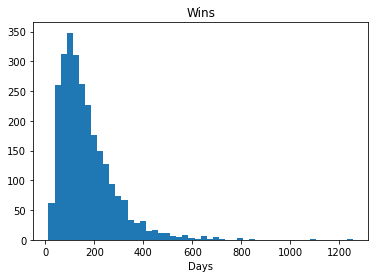

In [177]:
# Prettier plot on one of the following lessons ^^
plt.hist(days[wins], bins=50)
plt.xlabel("Days")
plt.title("Wins")

Text(0.5, 0, 'Days')

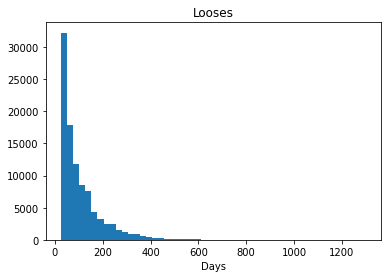

In [178]:
plt.hist(days[~wins], bins=50)
plt.title("Looses")
plt.xlabel("Days")

Executing this code took just a few seconds, but what if we need longer simulations?
How to use `numba` here?

In [179]:
@jit
def simulation2(n, seed = 1):
    np.random.seed(seed)
    days = np.zeros(n)
    wins = np.zeros(n, dtype=np.bool_)  # We must introduce a fix here to make it work
    for i in range(n):
        d = 1
        M = 100
        while True:
            inv1 = 0.1 * M
            inv2 = 0.5 * M
            if np.random.rand() < 0.1:
                M += inv1 * 9
            else:
                M -= inv1
            M += inv2 * 0.02
            if M > 10_000.0:
                days[i] = d
                wins[i] = True
                break
            if M < 10.0:
                days[i] = d
                break
            d += 1
    return days, wins
_ = simulation2(100_000)

In [180]:
%timeit simulation2(100_000)

57.6 ms ± 433 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Almost 100 times faster...
Potentially we can shorten a day-long experiment into 15 minutes, it's a lot!

Can we do better? 
Yes we do, you can utilize parallelism and GPU for that.
[Read the documentation](https://numba.pydata.org/) if you're interested and go [thorough provided examples](https://numba.pydata.org/numba-doc/latest/user/examples.html). 

## Didn't make into a sprint, but may be useful...

Obviously it's just a fraction of `numpy` capabilities.
You should also check:

- [Views vs copies](https://numpy.org/doc/stable/user/basics.copies.html)
- Inplace operations
- `np.linalg` - matrices decompositions, eigenvalues etc.
- `np.fft` - fast Fourier transform
- `np.random` - different distributions and random numbers generation
- `np.polynomial` - working with polynomials
- `np.histogram` - histogram that returns sole numbers
- `np.einsum` - **super** smart calculations on tensors
- [Working with files](https://numpy.org/doc/stable/user/how-to-io.html)
- [Guide for people from the matlab world](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html)